<a href="https://colab.research.google.com/github/anilaksu/AI-and-Data-Science-Codes/blob/main/Data_Science_Project_1_Airlines_Ticket_Fare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of Fare of Airlines Tickets using Machine Learning**


Anil Aksu

Personal e-mail: aaa293@cornell.edu


## Notebook Organization:
- **Business Understanding**
- **Data Collection**
- **Data Cleaning**
- **Data Analysis**
- **Feature Engineering**
- **Model Building**
- **Deployment**

  






#1.**Airlines Business and Ticket Prices**

What is TensorFlow?
* A library that allows to perform a deep-learning model on unstructured data.

Why TensorFlow?
1.   Write fast deep learning code in Python (able to run on a GPU)
2.   Able to access many pre-built deep learning models
3.   Whole stack: preprocess, model, and deploy
4. Originally designed and used in-house by Google





#2.**Data Collection**

In [1]:
# Here we set our working directory in our google drive to access datasets externally
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/ColabNotebooks/Data Science Projects

Mounted at /content/drive
/content/drive/MyDrive/ColabNotebooks/Data Science Projects


In [61]:
## Getting our training and test data for Fligh Prices
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

# Let's read training and test data
df_train = pd.read_excel("Flight_Price/Data_Train.xlsx")
df_test = pd.read_excel("Flight_Price/Test_set.xlsx")
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#3.Data Cleaning

In [62]:
# Here we see Non-Null values so that we decide what to do with the missing values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [63]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [64]:
df_train[df_train['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [65]:
## By observation, Route and Total Stops have missing values so we will drop row with missing value
df_train.dropna(inplace = True)
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

##3.1 Extract Derived Features

In [205]:
data = df_train.copy() # Here we create a copy so that we will have access to the original data, if something goes wrong
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [206]:
def change_into_Datetime(col):
  data[col] = pd.to_datetime(data[col])

In [207]:
for feature in ['Dep_Time', 'Arrival_Time', 'Date_of_Journey']:
  change_into_Datetime(feature)

In [208]:
# Let's convert date data into numerical day, month, year
data['Journey_day'] = data['Date_of_Journey'].dt.day
data['Journey_month'] = data['Date_of_Journey'].dt.month
data['Journey_year'] = data['Date_of_Journey'].dt.year
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-01-17 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-01-17 05:50:00,2024-01-17 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-01-17 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2024-01-17 18:05:00,2024-01-17 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2024-01-17 16:50:00,2024-01-17 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


In [209]:
def extract_hour_min(df, col):
  df[col + "_hour"]= df[col].dt.hour
  df[col + "_minute"]= df[col].dt.minute
  return df.head(3)

In [210]:
extract_hour_min(data, "Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-01-17 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-01-17 05:50:00,2024-01-17 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-01-17 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25


In [211]:
extract_hour_min(data, "Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-01-17 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-01-17 05:50:00,2024-01-17 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-01-17 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25,4,25


In [212]:
cols_to_drop = ['Arrival_Time', 'Dep_Time']
data.drop(cols_to_drop, axis = 1, inplace = True)
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25


#4.Data Analysis

In [213]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot, init_notebook_mode

In [214]:
# Function that separates flights into buckets based on their departure time
def flight_dep_time(x):
  if (x > 4) and (x <= 8):
    return "Early Morning"
  elif (x>8) and (x <= 12):
    return "Morning"
  elif (x > 12) and (x <= 16):
    return "Noon"
  elif (x > 16) and (x <= 20):
    return "Evening"
  elif (x > 20) and (x <= 24):
    return "Night"
  else:
    return "late night"

<Axes: >

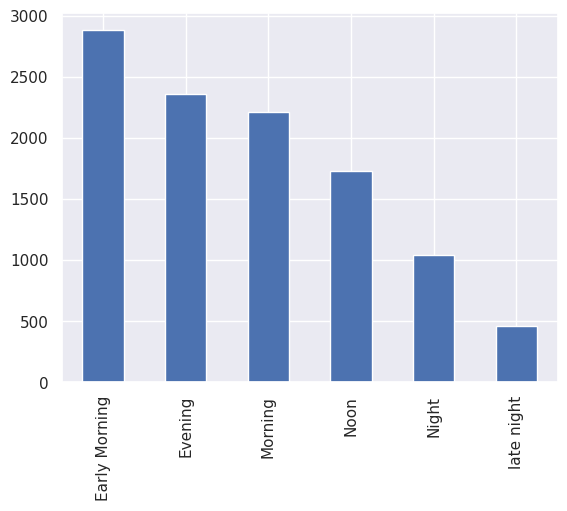

In [215]:
# Distribution of Flights
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind = "bar")

In [216]:
# Let's preprocess Duration feature
def preprocess_duration(x):
  '''
  This function modifies duration to fit into Xh Ym format in case one is missing
  '''
  if 'h' not in x:
    x = '0h' + ' ' + x
  elif 'm' not in x:
    x = x + ' ' + '0m'

  return x

In [217]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [218]:
# Here we convert Duration into numeric values
data['Duration_hours'] = data['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1]))
data['Duration_minutes'] = data['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1]))
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45


In [219]:
data['Duration_total_mins'] = data['Duration'].str.replace('h', "*60").str.replace(' ', '+').str.replace('m', "*1").apply(eval)

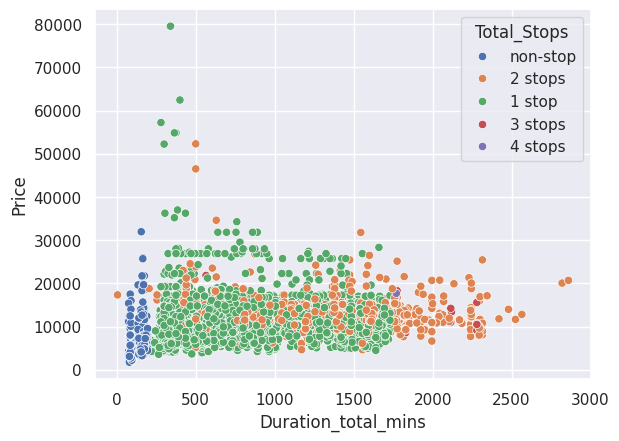

In [220]:
## Let's analyze Duration impacts on Price or not?
sns.scatterplot( x = "Duration_total_mins", y = "Price", hue = "Total_Stops",  data = data);

##4.1 Bi-variate Analysis

In [221]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending = False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

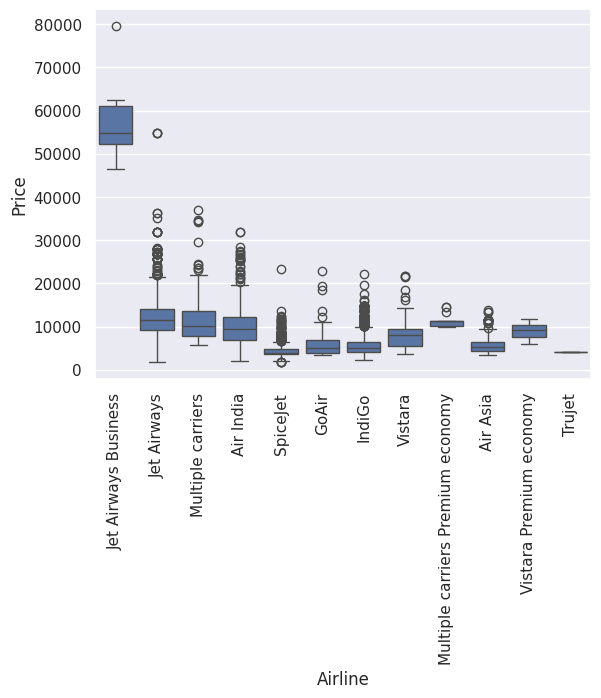

In [222]:
sns.boxplot(y='Price', x = 'Airline', data = data.sort_values('Price', ascending = False))
plt.xticks(rotation = 'vertical' )
plt.show();

##4.2 One-hot Encoding

In [223]:
# One-hot encoding is a feature encoding technique
cat_col = [col for col in data.columns if data[col].dtype == "object"] # Object type data columns
num_col = [col for col in data.columns if data[col].dtype != "object"] # Non-Object type data columns

In [224]:
data['Source'].apply(lambda x : 1 if x == 'Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [225]:
for sub_category in data['Source'].unique():
  data['Source_' + sub_category] = data['Source'].apply(lambda x: 1 if x == sub_category else 0)

data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,4,25,19,0,1140,0,0,1,0,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,...,23,30,5,25,325,0,1,0,0,0
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,...,21,35,4,45,285,1,0,0,0,0


In [226]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index
dict_airlines = {key:index for index, key in enumerate(airlines, 0)}
data['Airline'] = data['Airline'].map(dict_airlines)

In [227]:
data['Destination'].replace('New Delhi', 'Delhi', inplace= True)
destination = data.groupby(['Destination'])['Price'].mean().sort_values().index
dict_destination = {key:index for index, key in enumerate(destination, 0)}
data['Destination'] = data['Destination'].map(dict_destination)

In [228]:
data['Source'].replace('New Delhi', 'Delhi', inplace= True)
source = data.groupby(['Source'])['Price'].mean().sort_values().index
dict_source = {key:index for index, key in enumerate(source, 0)}
data['Source'] = data['Source'].map(dict_source)

In [229]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,2,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,3,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-09-06,4,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,4,25,19,0,1140,0,0,1,0,0
3,3,2019-12-05,3,3,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,...,23,30,5,25,325,0,1,0,0,0
4,3,2019-01-03,2,2,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,...,21,35,4,45,285,1,0,0,0,0


#5.Feature Engineering

In [230]:
# Here we encode Total Stops, which is an ordinal data
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [231]:
# Here we create a dictionary using Stop Count and map it back
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
data['Total_Stops'] = data['Total_Stops'].map(stop)
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [232]:
# Here we remove unnecessary features
data.drop(columns = ['Date_of_Journey', 'Additional_Info', 'Duration_total_mins', 'Source'], inplace = True)

In [233]:
# Year of flights
data['Journey_year'].unique()

array([2019])

In [234]:
# Since there is only one year, it does not make any difference
data.drop(columns = ['Journey_year'], inplace = True)

In [235]:
# Here we already have the number of stops, so we don't need the Route anymore
data.drop(columns = ['Route'], axis = 1, inplace = True)

In [236]:
# We already transformed duration so that we can drop the original Duration column
data.drop(columns = ['Duration'], axis = 1, inplace = True)
data.head()

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1,6218,5,12,18,5,23,30,5,25,0,1,0,0,0
4,3,2,1,13302,3,1,16,50,21,35,4,45,1,0,0,0,0


##5.1 Outlier Detection

In [237]:
def plot(df, col):
  fig, (ax1, ax2, ax3) = plt.subplots(3,1)
  sns.set(style="darkgrid")
  sns.distplot(df[col], ax = ax1)
  sns.boxplot(df[col], ax = ax2)
  sns.distplot(df[col], ax = ax3, kde = False)

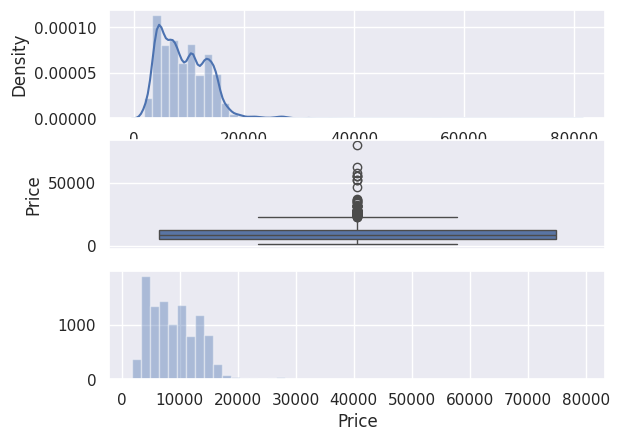

In [238]:
plot(data, 'Price')

In [239]:
# Here we remove outlier using Quantiles
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3 - q1

maximum = q3 + 1.5 * iqr
minimum = q1 - 1.5 * iqr

# Number of outlier in the data
len([price for price in data['Price'] if price > maximum or price < minimum])

94

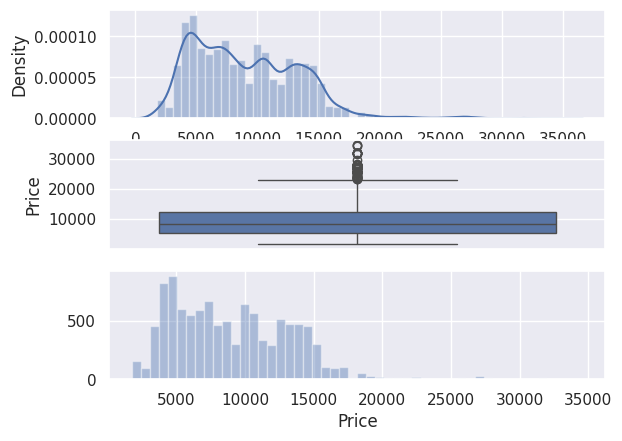

In [240]:
data['Price'] = np.where(data['Price'] >= 35000, data['Price'].median(), data['Price'])
plot(data, 'Price')

##5.2 Feature Selection

In [242]:
# Here we use Mutual Information approach to find out which features to keep in the ML model
from sklearn.feature_selection import mutual_info_regression

# Here we determine variables importance based on their impact on Price
X = data.drop(['Price'], axis = 1)
y = data['Price']
imp = mutual_info_regression(X, y)
df_imp = pd.DataFrame(imp, index = X.columns)
df_imp.columns = ['Importance'] # Here we name columns for future reference
df_imp

,Importance
Airline,0.981649
Destination,1.005293
Total_Stops,0.793693
Journey_day,0.195362
Journey_month,0.237307
Dep_Time_hour,0.334709
Dep_Time_minute,0.259529
Arrival_Time_hour,0.401076
Arrival_Time_minute,0.346855
Duration_hours,0.471372


In [243]:
# Here we sort the parameters to observe their order of importance
df_imp.sort_values(by = 'Importance', ascending = False)

,Importance
Destination,1.005293
Airline,0.981649
Total_Stops,0.793693
Source_Delhi,0.516793
Duration_hours,0.471372
Source_Kolkata,0.451980
Arrival_Time_hour,0.401076
Source_Banglore,0.381872
Arrival_Time_minute,0.346855
Duration_minutes,0.336514


#6.Model Building